<a href="https://colab.research.google.com/github/Siddhes2/TechNext_Task/blob/main/Task1_TechNext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
plt.style.use('default')
sns.set_palette("husl")

print("Decision Tree Classification Analysis")
print("=" * 50)

Decision Tree Classification Analysis


In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# Create DataFrame for better handling
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("\n1. DATASET OVERVIEW")
print("-" * 20)
print(f"Dataset shape: {df.shape}")
print(f"Features: {list(iris.feature_names)}")
print(f"Target classes: {list(iris.target_names)}")
print(f"\nClass distribution:")
print(df['species'].value_counts())

# Display first few rows
print(f"\nFirst 5 rows:")
print(df.head())

# Basic statistics
print(f"\nDataset Statistics:")
print(df.describe())

# Check for missing values
print(f"\nMissing values: {df.isnull().sum().sum()}")


1. DATASET OVERVIEW
--------------------
Dataset shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Dataset Statistics:
       sepal length (cm


2. EXPLORATORY DATA ANALYSIS
------------------------------


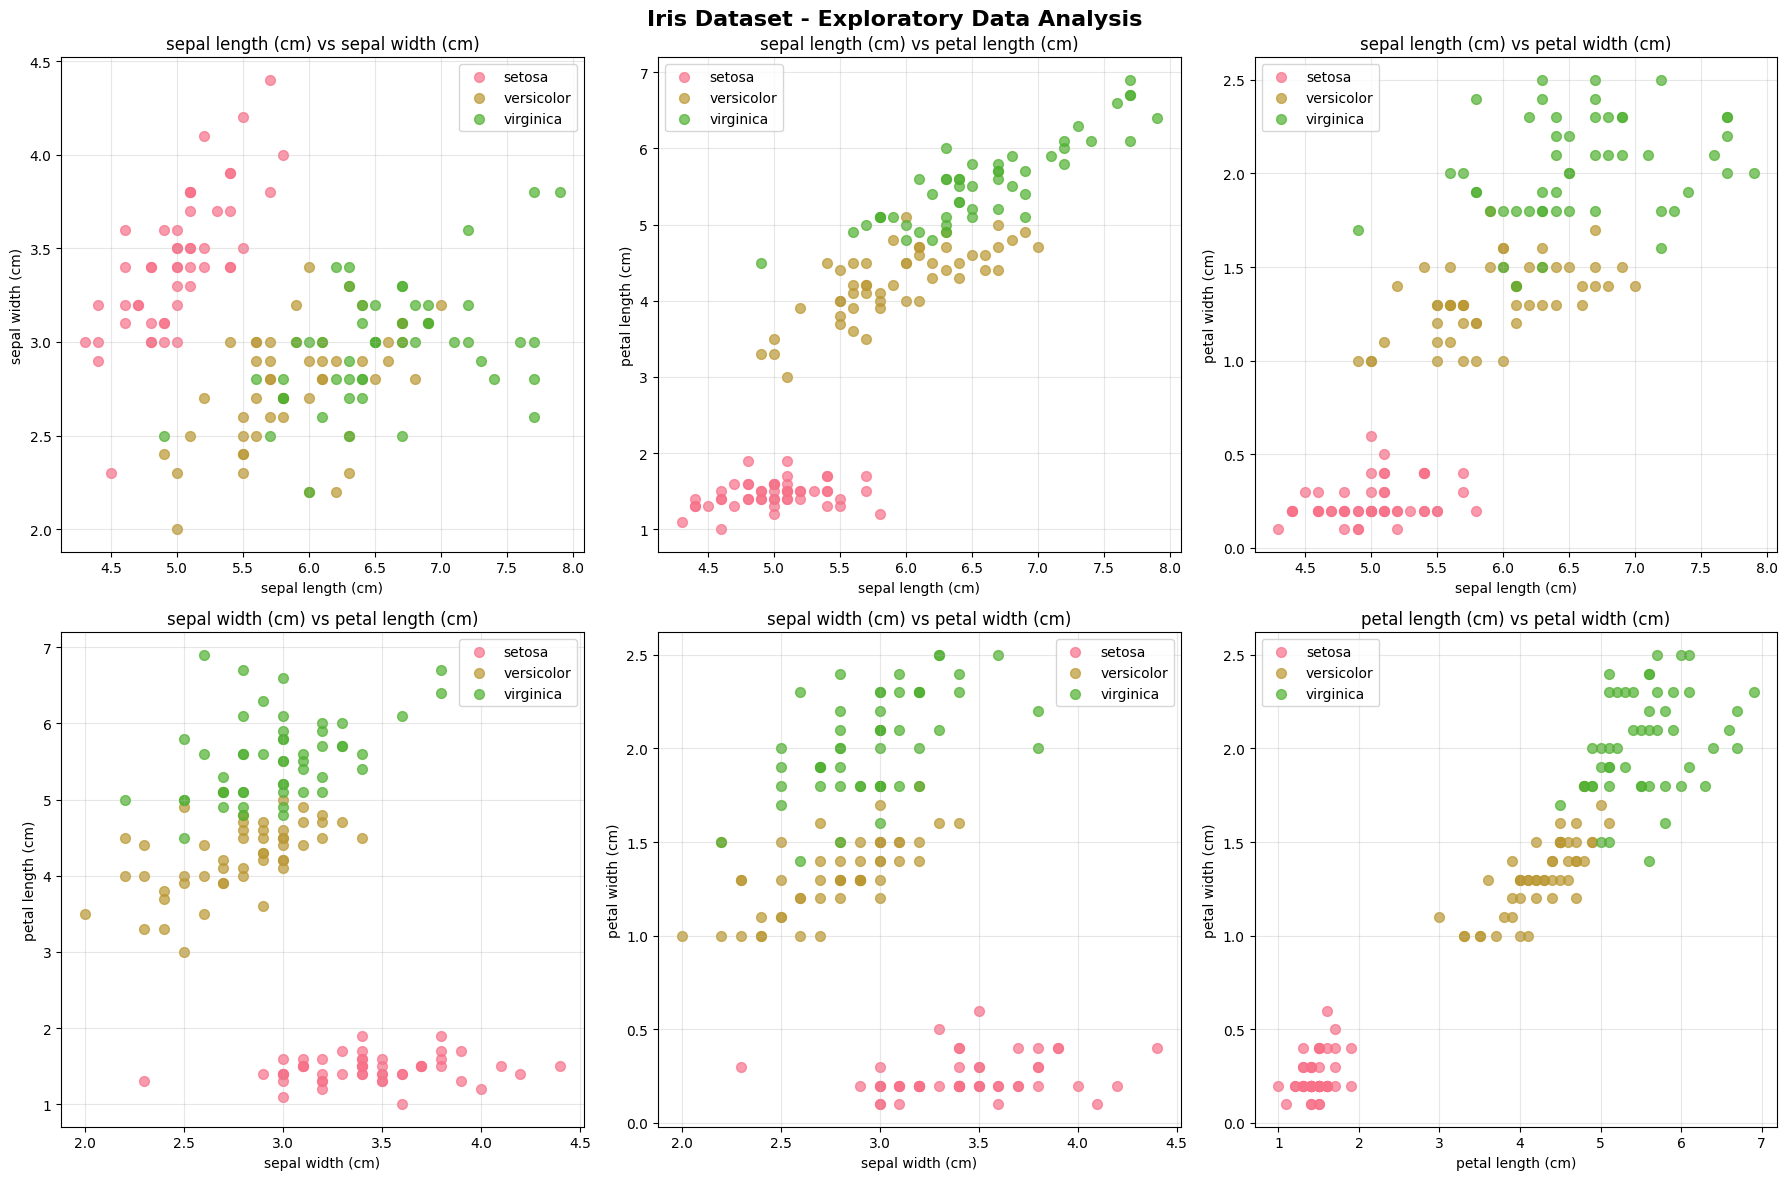

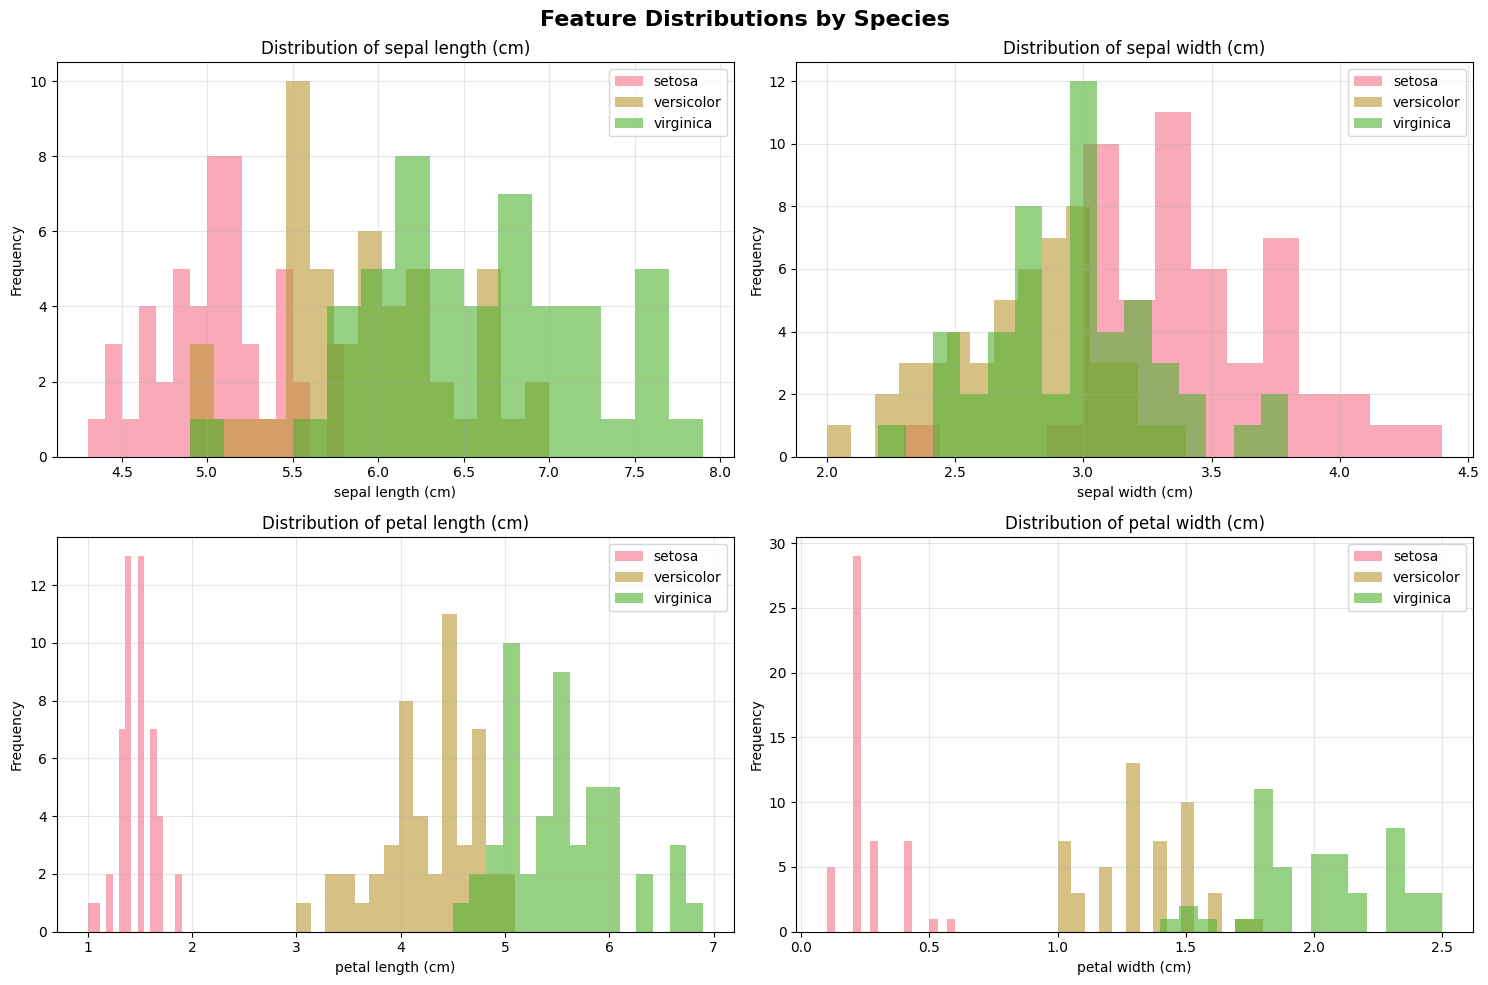

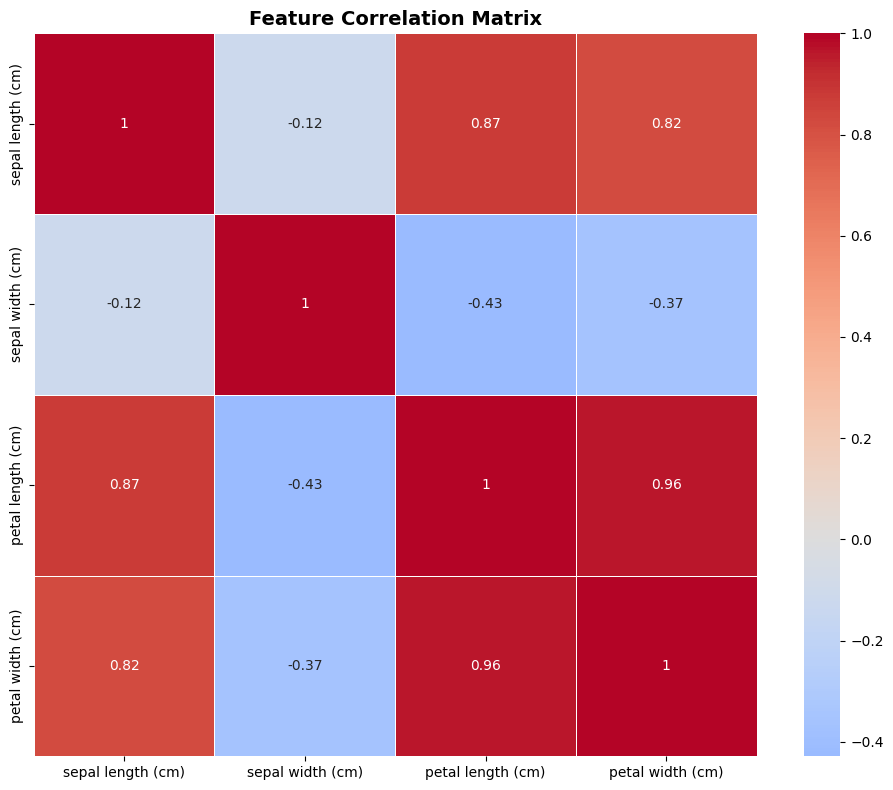

In [ ]:
# 2. EXPLORATORY DATA ANALYSIS
# ============================

print("\n2. EXPLORATORY DATA ANALYSIS")
print("-" * 30)

# Create visualization figure
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Iris Dataset - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Pairplot-style scatter plots
features = iris.feature_names[:4]
feature_pairs = [(0,1), (0,2), (0,3), (1,2), (1,3), (2,3)]

for idx, (i, j) in enumerate(feature_pairs):
    row = idx // 3
    col = idx % 3

    for target_idx, species in enumerate(iris.target_names):
        mask = y == target_idx
        axes[row, col].scatter(X[mask, i], X[mask, j],
                             label=species, alpha=0.7, s=50)

    axes[row, col].set_xlabel(features[i])
    axes[row, col].set_ylabel(features[j])
    axes[row, col].set_title(f'{features[i]} vs {features[j]}')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Feature Distributions by Species', fontsize=16, fontweight='bold')

for idx, feature in enumerate(features):
    row = idx // 2
    col = idx % 2

    for species in iris.target_names:
        species_data = df[df['species'] == species][feature]
        axes[row, col].hist(species_data, alpha=0.6, label=species, bins=15)

    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# 3. DATA PREPROCESSING
# ====================

print("\n3. DATA PREPROCESSING")
print("-" * 22)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Feature dimensions: {X_train.shape[1]}")

# Check class distribution in splits
train_dist = np.bincount(y_train)
test_dist = np.bincount(y_test)
print(f"\nTraining set class distribution: {train_dist}")
print(f"Testing set class distribution: {test_dist}")



3. DATA PREPROCESSING
----------------------
Training set size: 105 samples
Testing set size: 45 samples
Feature dimensions: 4

Training set class distribution: [35 35 35]
Testing set class distribution: [15 15 15]


In [ ]:
4. #DECISION TREE MODEL BUILDING
# ===============================

print("\n4. DECISION TREE MODEL TRAINING")
print("-" * 32)

# Create and train decision tree with default parameters
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

# Make predictions
y_pred_default = dt_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

print(f"Default Decision Tree Accuracy: {accuracy_default:.4f}")

# Cross-validation for default model
cv_scores_default = cross_val_score(dt_default, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores_default}")
print(f"Mean CV accuracy: {cv_scores_default.mean():.4f} (+/- {cv_scores_default.std() * 2:.4f})")



4. DECISION TREE MODEL TRAINING
--------------------------------
Default Decision Tree Accuracy: 0.9333
Cross-validation scores: [0.95238095 0.95238095 0.95238095 0.9047619  0.95238095]
Mean CV accuracy: 0.9429 (+/- 0.0381)


In [ ]:
# 5. HYPERPARAMETER TUNING
# ========================

print("\n5. HYPERPARAMETER TUNING")
print("-" * 25)

# Define parameter grid
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Grid search with cross-validation
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Train optimized model
dt_optimized = grid_search.best_estimator_
y_pred_optimized = dt_optimized.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)

print(f"Optimized Decision Tree Accuracy: {accuracy_optimized:.4f}")



5. HYPERPARAMETER TUNING
-------------------------
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation score: 0.9524
Optimized Decision Tree Accuracy: 0.9333



6. MODEL EVALUATION
--------------------
Classification Report (Optimized Model):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



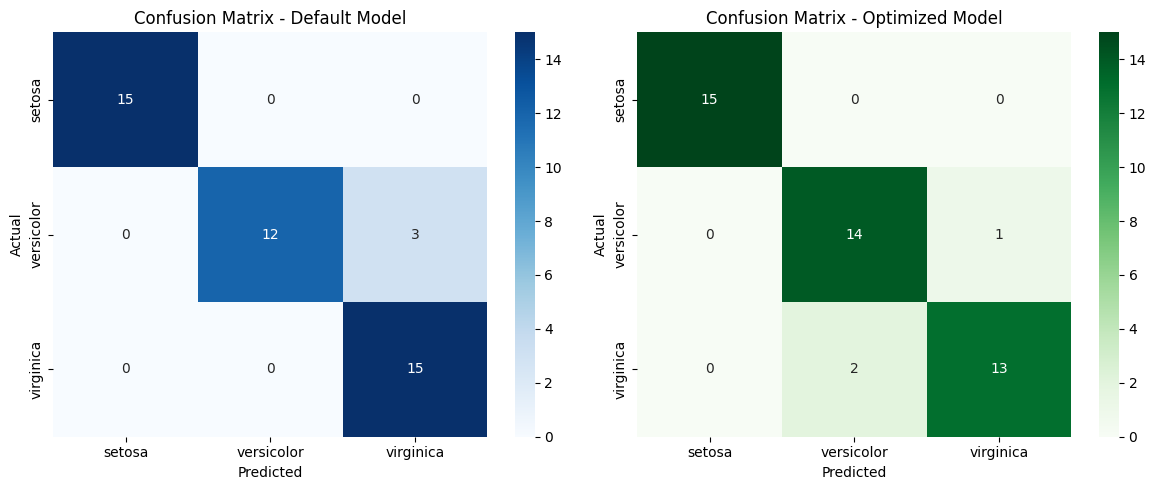


Feature Importance:
             Feature  Importance
2  petal length (cm)    0.557093
3   petal width (cm)    0.442907
1   sepal width (cm)    0.000000
0  sepal length (cm)    0.000000


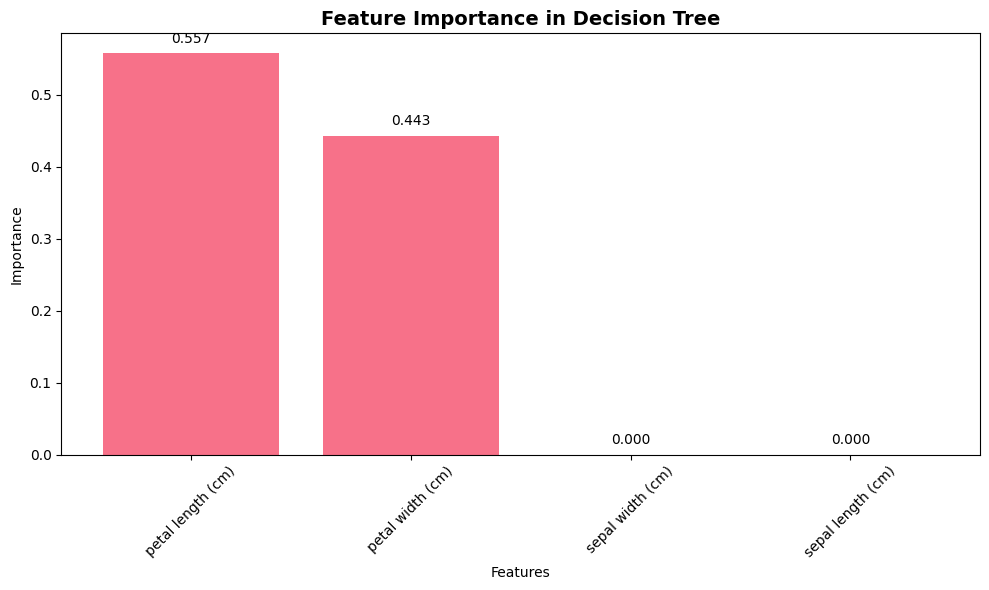

In [ ]:
# 6. MODEL EVALUATION
# ==================

print("\n6. MODEL EVALUATION")
print("-" * 20)

# Detailed classification report
print("Classification Report (Optimized Model):")
print(classification_report(y_test, y_pred_optimized, target_names=iris.target_names))

# Confusion Matrix
plt.figure(figsize=(12, 5))

# Default model confusion matrix
plt.subplot(1, 2, 1)
cm_default = confusion_matrix(y_test, y_pred_default)
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - Default Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Optimized model confusion matrix
plt.subplot(1, 2, 2)
cm_optimized = confusion_matrix(y_test, y_pred_optimized)
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Greens',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - Optimized Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Feature importance
feature_importance = dt_optimized.feature_importances_
importance_df = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

# Visualize feature importance
plt.figure(figsize=(10, 6))
bars = plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance in Decision Tree', fontsize=14, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)

# Add value labels on bars
for bar, importance in zip(bars, importance_df['Importance']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{importance:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()



7. DECISION TREE VISUALIZATION
-------------------------------


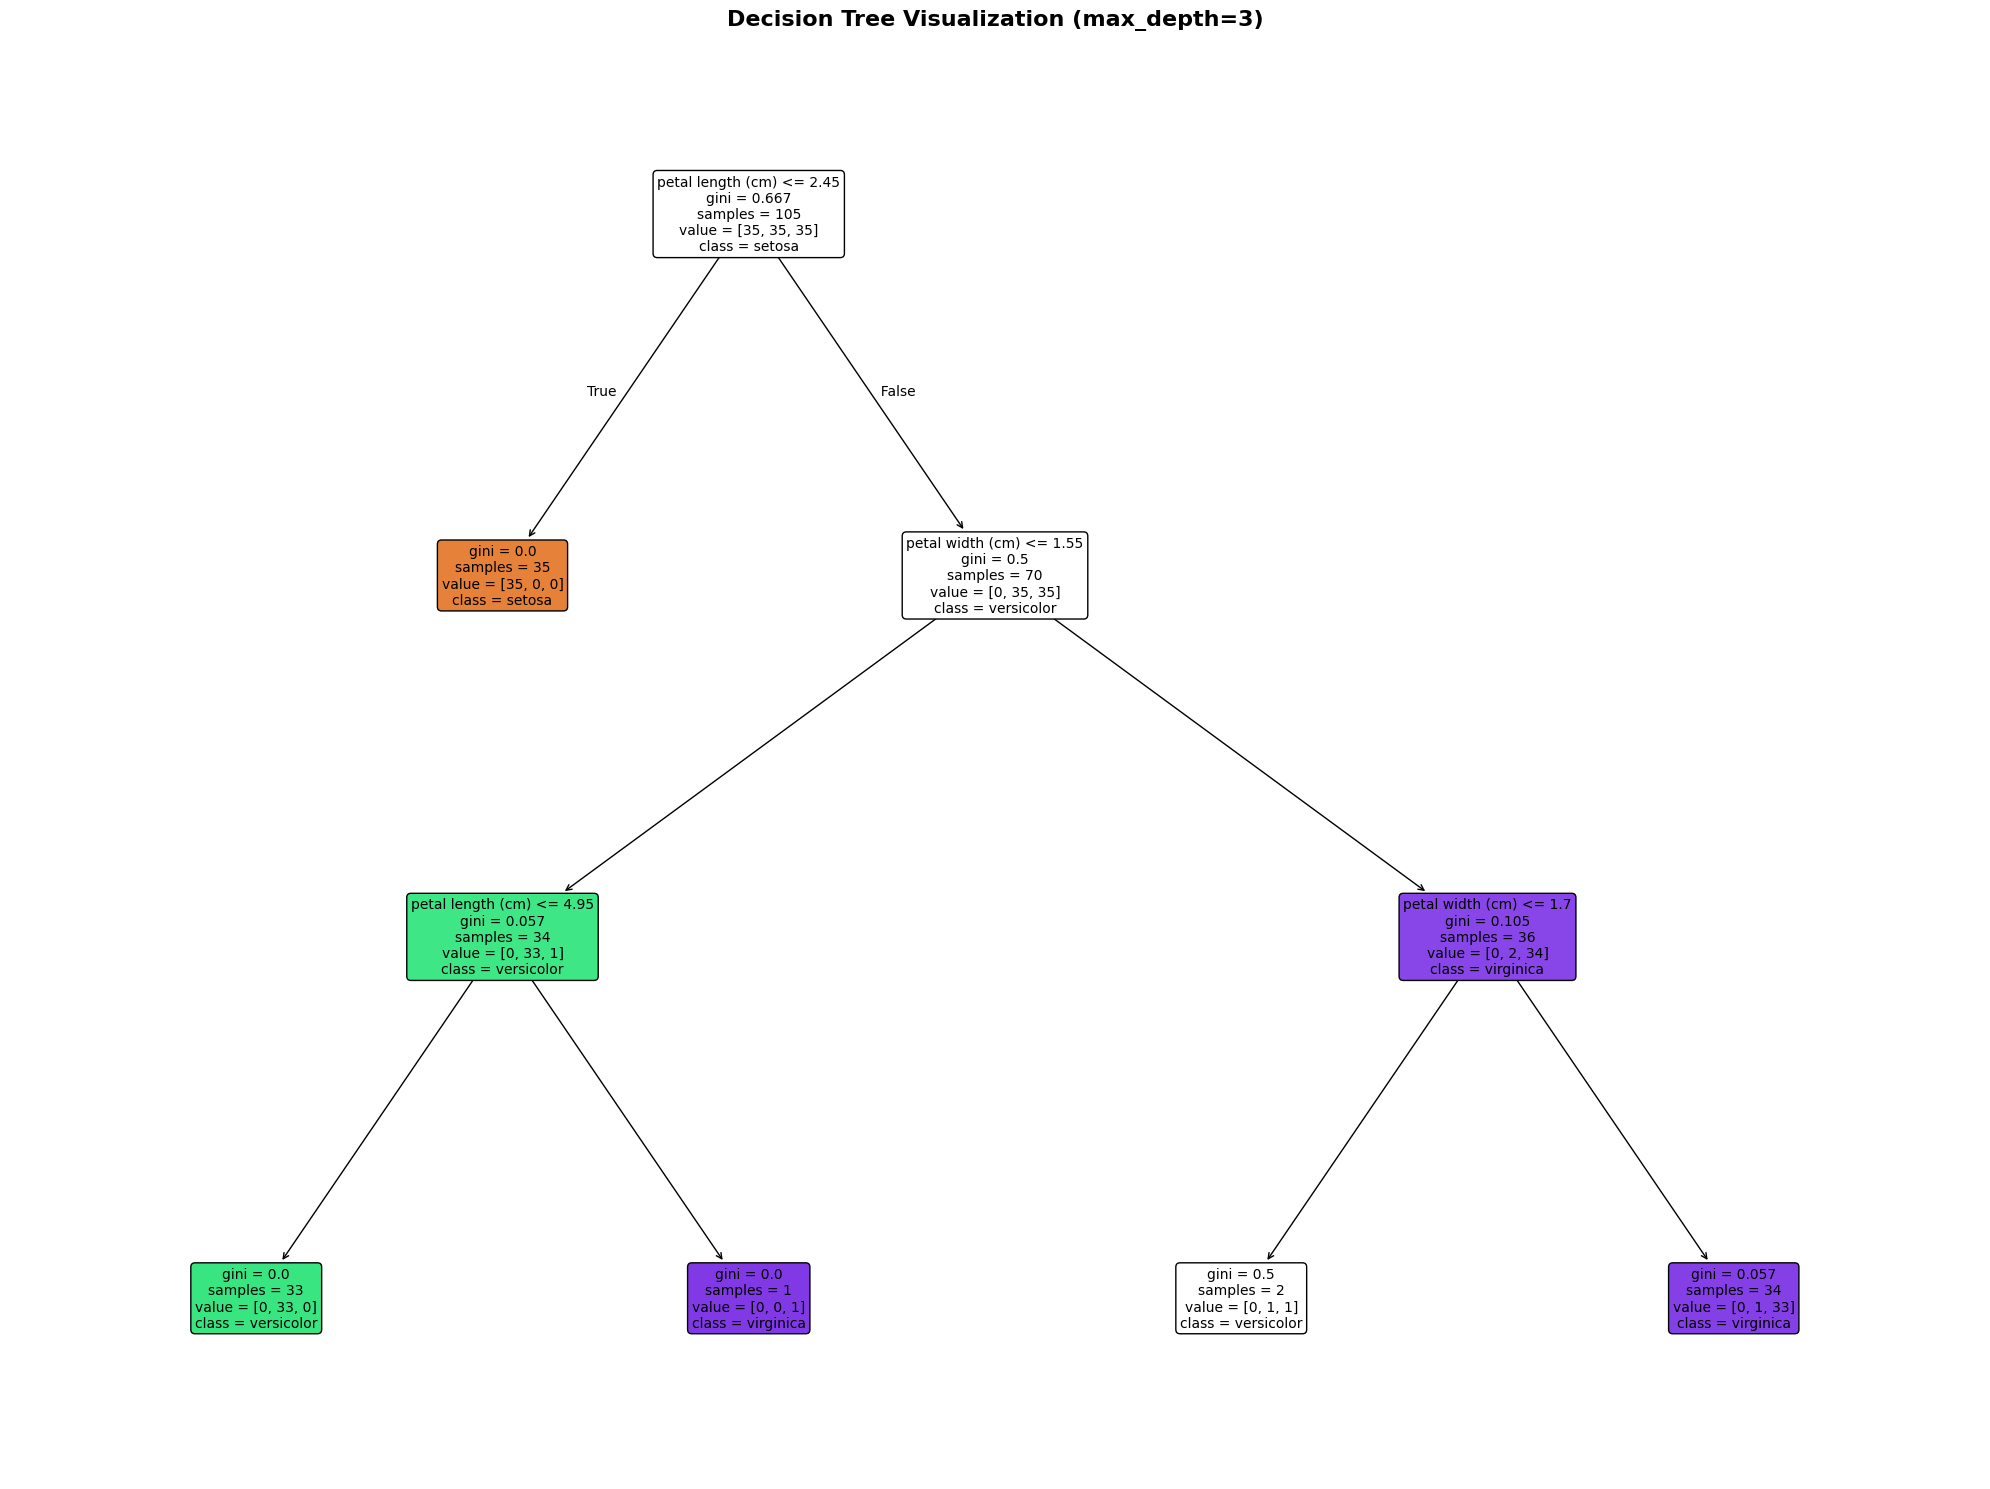


Decision Tree Rules (Text Format):
-----------------------------------
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.55
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.55
|   |   |--- petal width (cm) <= 1.70
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.70
|   |   |   |--- class: 2



In [ ]:
# 7. DECISION TREE VISUALIZATION
# ==============================

print("\n7. DECISION TREE VISUALIZATION")
print("-" * 31)

# Create a simpler tree for better visualization
dt_simple = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_simple.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 15))
plot_tree(dt_simple,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Visualization (max_depth=3)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Text representation of the tree
print("\nDecision Tree Rules (Text Format):")
print("-" * 35)
tree_rules = export_text(dt_simple, feature_names=iris.feature_names)
print(tree_rules)


8. DECISION BOUNDARY VISUALIZATION
-----------------------------------


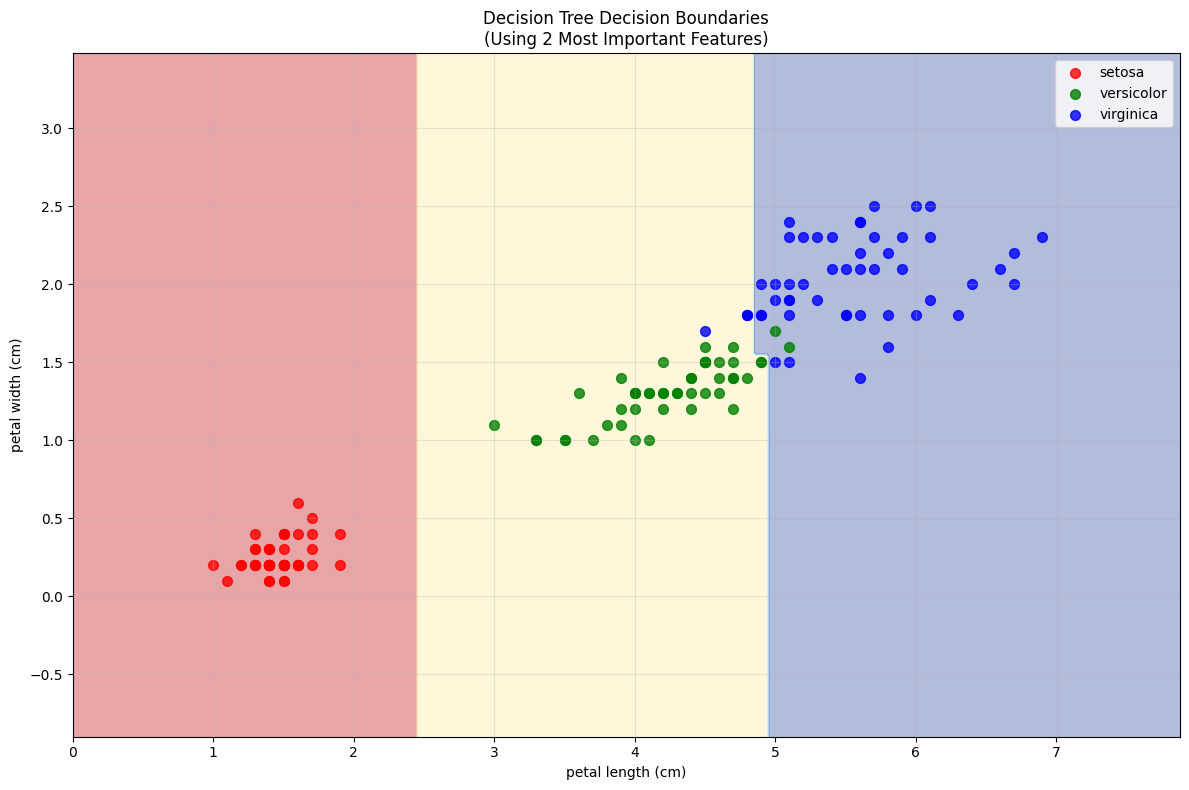

In [ ]:
# 8. DECISION BOUNDARY VISUALIZATION
# =================================

print("\n8. DECISION BOUNDARY VISUALIZATION")
print("-" * 35)

# For 2D visualization, use two most important features
top_features = importance_df.head(2)['Feature'].tolist()
feature_indices = [iris.feature_names.index(feature) for feature in top_features]

X_2d = X[:, feature_indices]
X_train_2d, X_test_2d = X_train[:, feature_indices], X_test[:, feature_indices]

# Train a 2D decision tree
dt_2d = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_2d.fit(X_train_2d, y_train)

# Create a mesh for decision boundary
h = 0.02
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on the mesh
Z = dt_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

# Plot data points
colors = ['red', 'green', 'blue']
for i, species in enumerate(iris.target_names):
    mask = y == i
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1],
               c=colors[i], label=species, alpha=0.8, s=50)

plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title('Decision Tree Decision Boundaries\n(Using 2 Most Important Features)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()